In [1]:
#Importamos Libreraías

import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Cargo el DataSet agregandole 'encoding='latin1', delimiter=';'' al final ya que, de no agregarlo, visual no me lo carga.

df = pd.read_csv(r"C:\Users\Christian\OneDrive\Documentos\CoderHouse\Fundamentos para la Ciencia de Datos 1\PreEntrega 1/datos-fallecidos-en-siniestros-de-trnsito-2013-2019.csv", encoding='latin1', delimiter=';')
df

,Fecha y hora,Fecha,Hora,Hora Entera,Departamento,Localidad,Jurisdiccion,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo,Lugar del Siniestro,X,Y
0,01/01/2013 23:15,01/01/2023,23:15:00,23:00,CANELONES,N/C,NACIONAL,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34,F,0,N/C,RUTA 101 km 24,"589815,34","6143862,76"
1,01/01/2013 23:35,01/01/2013,23:35:00,23:00,SALTO,SALTO,DEPARTAMENTAL,ATROPELLO DE PEATàN,PEATàN,PEATàN,52,F,0,MOTO,MAGALLANES pr¢x. Barrio Chinchurreta,"411579,77","6526872,77"
2,03/01/2013 23:35,03/01/2013,23:35:00,23:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34,M,8,CAMION,RUTA 3 km. 358,"412321,54","6407067,58"
3,04/01/2013 7:10,04/01/2013,7:10:00,7:00,COLONIA,N/C,NACIONAL,DESPISTE,AUTO,CONDUCTOR,49,F,1,N/C,RUTA 21 esq. Dr Irastorza,"379424,37","6240356,26"
4,04/01/2013 11:00,04/01/2013,11:00:00,11:00,CANELONES,PROGRESO,DEPARTAMENTAL,DESPISTE,AUTO,CONDUCTOR,91,M,0,N/C,CESAR MAYO GUTIERREZ senda CAMINO PELUFFO,"570675,1","6164479,53"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,23,F,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3428,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,5,M,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3429,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,23,M,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3430,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,CAMIONETA,PASAJERO,60,F,27,AUTO,"RUTA 24 KM 88,000","405112,07","6404241,81"


In [2]:
#Verifico atributos e instancias
df.shape

(3432, 17)

In [3]:
#Verifico columnas existentes
print("Columnas existentes en el DataFrame:")
print(df.columns)

Columnas existentes en el DataFrame:
Index(['Fecha y hora', 'Fecha', 'Hora', 'Hora Entera', 'Departamento',
       'Localidad', 'Jurisdiccion ', 'Tipo de Siniestro', 'Vehiculo', 'Rol',
       'Edad', 'Sexo', 'Fallecido a los Dias', 'Otro vehiculo',
       'Lugar del Siniestro', 'X', 'Y'],
      dtype='object')


In [4]:
#Borro columnas que no me sirven:  'X', 'Y', y 'Jurisdiccion '
df = df.drop(columns=['X', 'Y', 'Jurisdiccion ', 'Lugar del Siniestro', 'Fallecidos'], errors='ignore')
df 

,Fecha y hora,Fecha,Hora,Hora Entera,Departamento,Localidad,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo
0,01/01/2013 23:15,01/01/2023,23:15:00,23:00,CANELONES,N/C,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34,F,0,N/C
1,01/01/2013 23:35,01/01/2013,23:35:00,23:00,SALTO,SALTO,ATROPELLO DE PEATàN,PEATàN,PEATàN,52,F,0,MOTO
2,03/01/2013 23:35,03/01/2013,23:35:00,23:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34,M,8,CAMION
3,04/01/2013 7:10,04/01/2013,7:10:00,7:00,COLONIA,N/C,DESPISTE,AUTO,CONDUCTOR,49,F,1,N/C
4,04/01/2013 11:00,04/01/2013,11:00:00,11:00,CANELONES,PROGRESO,DESPISTE,AUTO,CONDUCTOR,91,M,0,N/C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,23,F,0,CAMIONETA
3428,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,5,M,0,CAMIONETA
3429,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,23,M,0,CAMIONETA
3430,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,CAMIONETA,PASAJERO,60,F,27,AUTO


In [5]:
# Contar las filas del DataFrame
numero_filas = len(df)
print (numero_filas)

3432


In [6]:
# Verificar valores nulos en cada columna
nulos = df.isnull().sum()

# Mostrar el resultado
print(nulos)

Fecha y hora            0
Fecha                   0
Hora                    0
Hora Entera             0
Departamento            0
Localidad               0
Tipo de Siniestro       0
Vehiculo                0
Rol                     0
Edad                    0
Sexo                    0
Fallecido a los Dias    0
Otro vehiculo           0
dtype: int64


In [7]:
# Eliminar duplicados
df_sin_duplicados = df.drop_duplicates()

# Verificar si los duplicados se eliminaron
print(df_sin_duplicados.duplicated().sum())

0


C:\Users\Christian\AppData\Local\Temp\ipykernel_5448\3561718670.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cantidad de Fallecimientos', y='Departamento', data=df_count, palette='viridis')


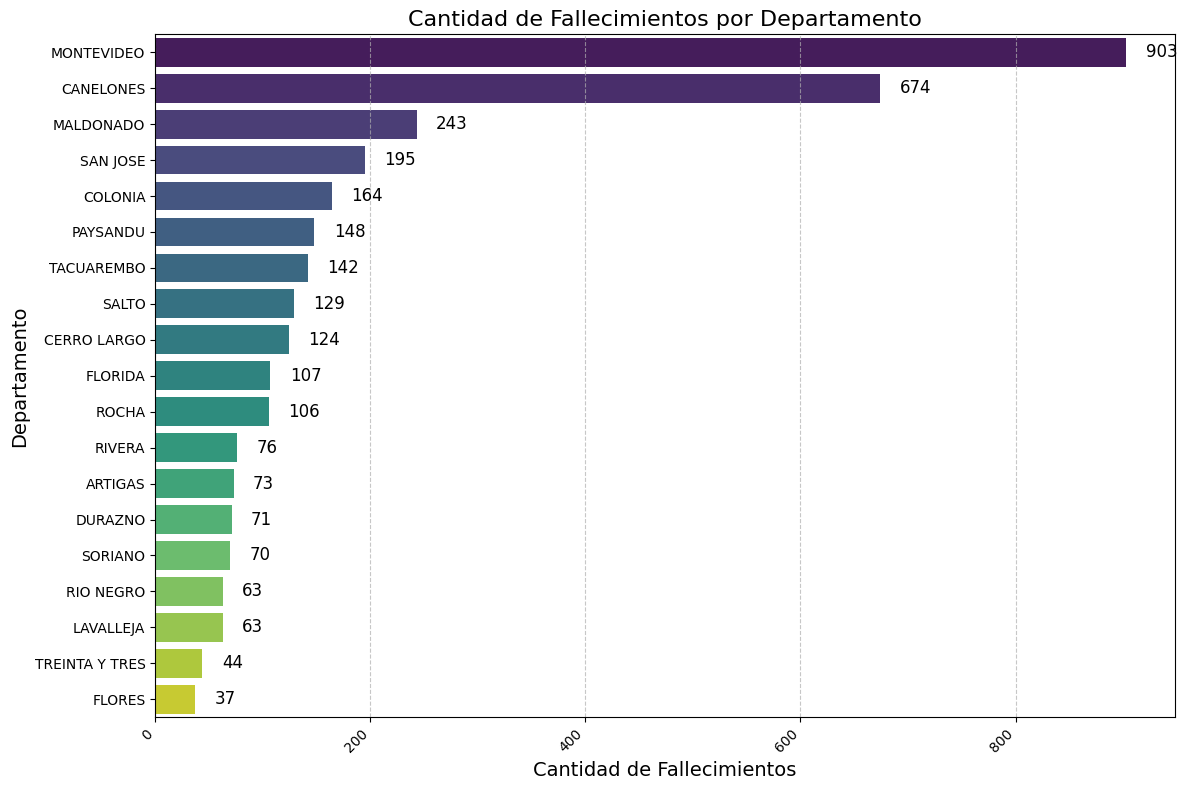

In [8]:
# Contar la cantidad de fallecimientos por departamento
df_count = df['Departamento'].value_counts().reset_index()
df_count.columns = ['Departamento', 'Cantidad de Fallecimientos']

# Ordenar de forma descendente
df_count = df_count.sort_values(by='Cantidad de Fallecimientos', ascending=False)

# Configurar el gráfico
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Cantidad de Fallecimientos', y='Departamento', data=df_count, palette='viridis')

# Añadir etiquetas con la cifra exacta en cada barra
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.02 * max(df_count['Cantidad de Fallecimientos']), p.get_y() + p.get_height() / 2,
            f'{int(width)}', ha='left', va='center', fontsize=12)

# Mejorar la visualización
plt.title('Cantidad de Fallecimientos por Departamento', fontsize=16)
plt.xlabel('Cantidad de Fallecimientos', fontsize=14)
plt.ylabel('Departamento', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

C:\Users\Christian\AppData\Local\Temp\ipykernel_5448\1703463442.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cantidad de Fallecimientos', y='Vehiculo', data=df_count, palette='viridis')


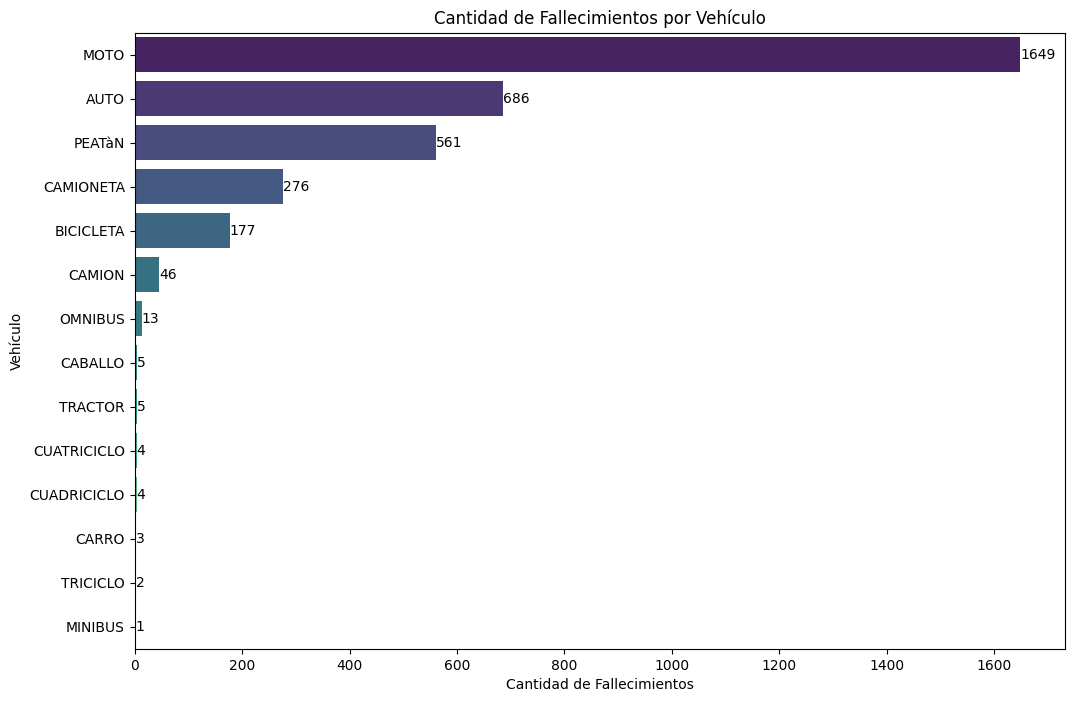

In [9]:
# Calculo la cantidad de fallecimientos por vehículo
df_count = df['Vehiculo'].value_counts().reset_index()
df_count.columns = ['Vehiculo', 'Cantidad de Fallecimientos']

# Ordeno de forma descendente
df_count = df_count.sort_values(by='Cantidad de Fallecimientos', ascending=False)

# Hago el gráfico
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Cantidad de Fallecimientos', y='Vehiculo', data=df_count, palette='viridis')

# Agrego los números en cada barra
for index, value in enumerate(df_count['Cantidad de Fallecimientos']):
    plt.text(value, index, f'{value}', va='center')

# Etiquetas y título
plt.title('Cantidad de Fallecimientos por Vehículo')
plt.xlabel('Cantidad de Fallecimientos')
plt.ylabel('Vehículo')

plt.show()

C:\Users\Christian\AppData\Local\Temp\ipykernel_5448\1846266515.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cantidad de Fallecimientos', y='Tipo de Siniestro', data=df_count, palette='viridis')


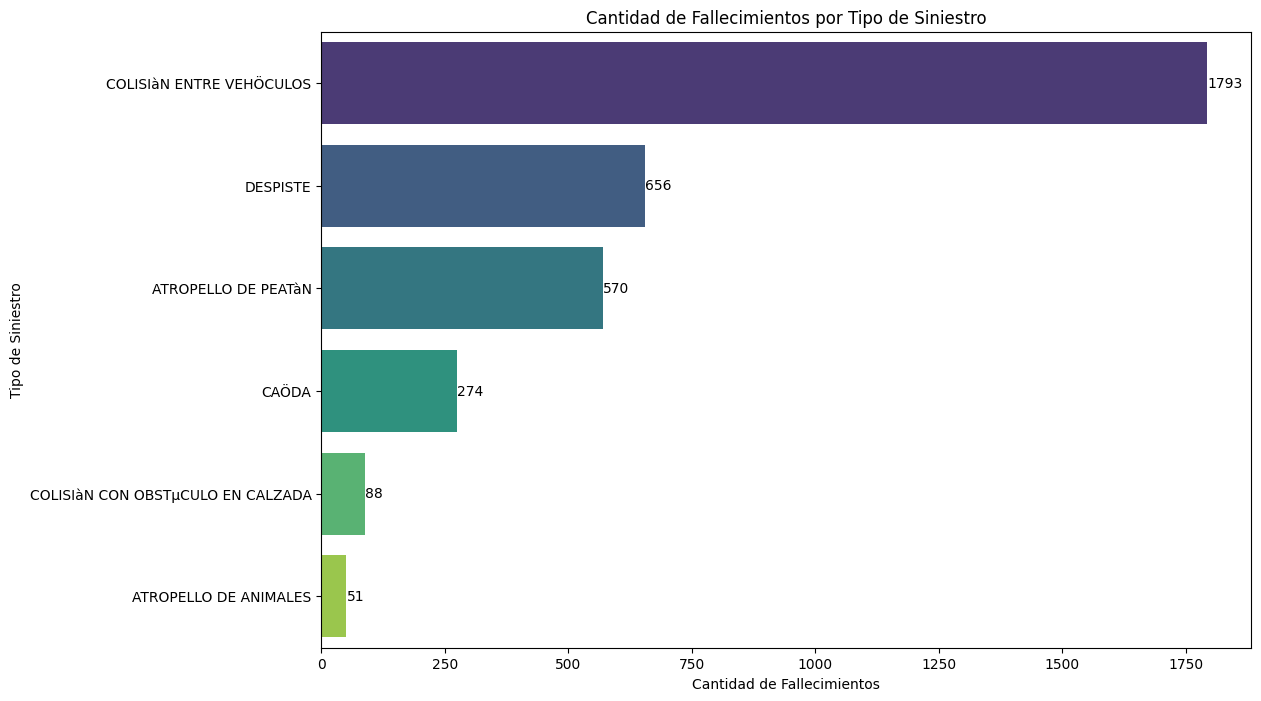

In [10]:
# Calculo la cantidad de fallecimientos por Tipo de Siniestro
df_count = df['Tipo de Siniestro'].value_counts().reset_index()
df_count.columns = ['Tipo de Siniestro', 'Cantidad de Fallecimientos']

# Ordeno de forma descendente
df_count = df_count.sort_values(by='Cantidad de Fallecimientos', ascending=False)

# Hago el gráfico
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Cantidad de Fallecimientos', y='Tipo de Siniestro', data=df_count, palette='viridis')

# Agrego los números en cada barra
for index, value in enumerate(df_count['Cantidad de Fallecimientos']):
    plt.text(value, index, f'{value}', va='center')

# Etiquetas y título
plt.title('Cantidad de Fallecimientos por Tipo de Siniestro')
plt.xlabel('Cantidad de Fallecimientos')
plt.ylabel('Tipo de Siniestro')

plt.show()

In [11]:
# Elimino filas donde 'edad' sea NaN o no sea numérica
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
df = df.dropna(subset=['Edad'])

# Calculo la edad promedio de los fallecidos
edad_promedio = df['Edad'].mean()

print(f"La edad promedio de los fallecidos es: {edad_promedio:.2f} años")

La edad promedio de los fallecidos es: 43.18 años


C:\Users\Christian\AppData\Local\Temp\ipykernel_5448\1041584642.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cantidad de Fallecimientos', y='Sexo', data=df_count, palette='viridis')


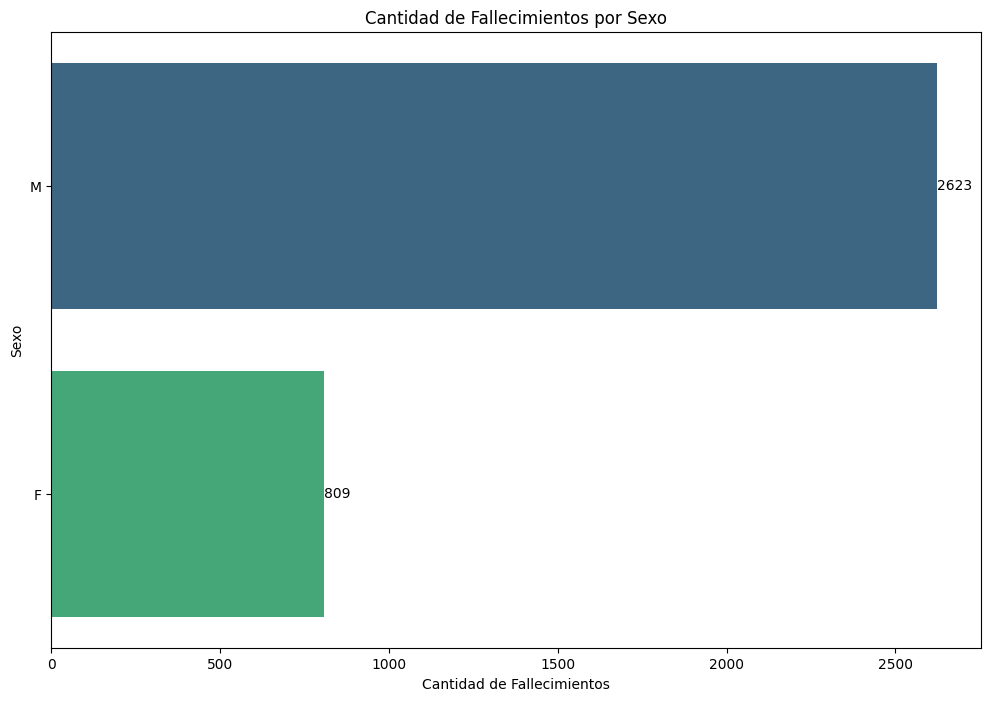

In [12]:
# Calculo la cantidad de fallecimientos por sexo
df_count = df['Sexo'].value_counts().reset_index()
df_count.columns = ['Sexo', 'Cantidad de Fallecimientos']

# Ordeno de forma descendente
df_count = df_count.sort_values(by='Cantidad de Fallecimientos', ascending=False)

# Hago el gráfico
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Cantidad de Fallecimientos', y='Sexo', data=df_count, palette='viridis')

# Agrego los números en cada barra
for index, value in enumerate(df_count['Cantidad de Fallecimientos']):
    plt.text(value, index, f'{value}', va='center')

# Etiquetas y título
plt.title('Cantidad de Fallecimientos por Sexo')
plt.xlabel('Cantidad de Fallecimientos')
plt.ylabel('Sexo')

plt.show()

<Axes: xlabel='Edad', ylabel='Count'>

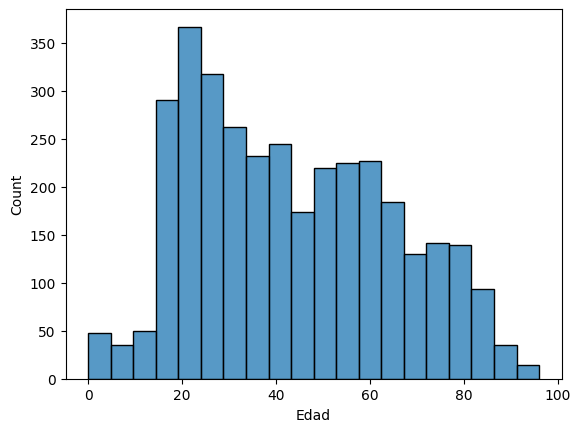

In [13]:
sns.histplot(data=df, x="Edad",bins=20)


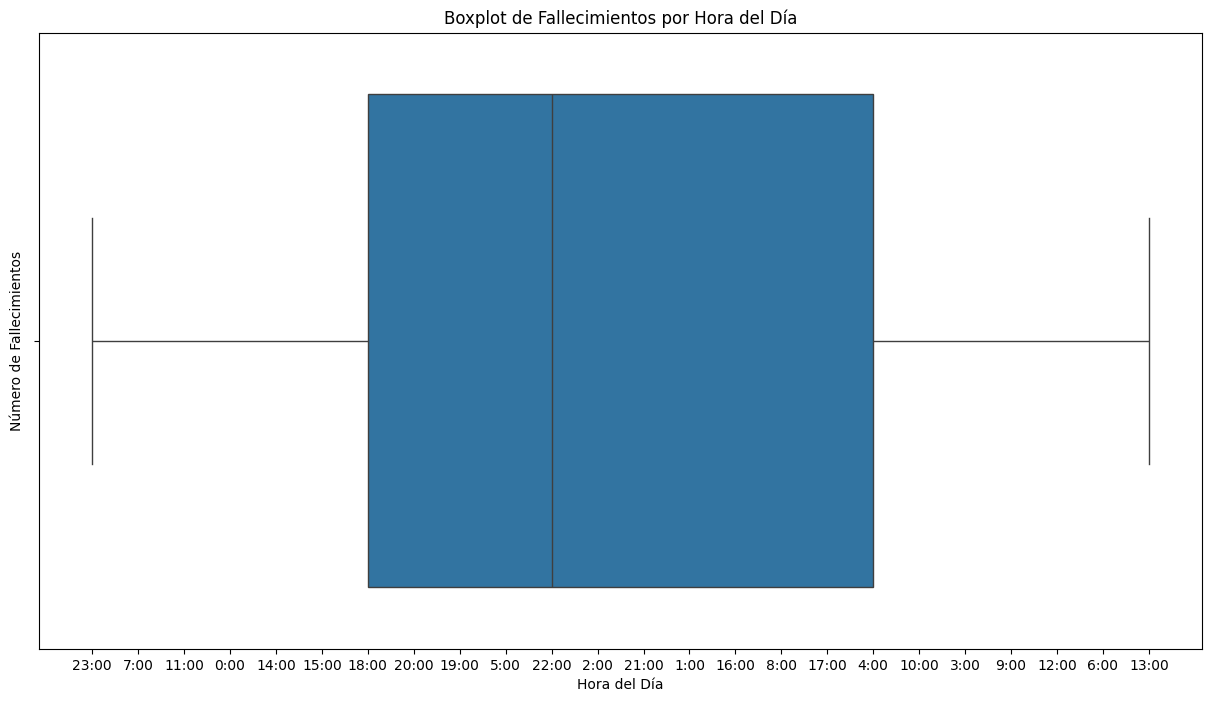

In [14]:

# Crear el boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Hora Entera', data=df)
plt.xlabel('Hora del Día')
plt.ylabel('Número de Fallecimientos')
plt.title('Boxplot de Fallecimientos por Hora del Día')
plt.show()

In [23]:
# Con los siguientes datos podemos concluir que:
# 1) Los hombres son el principal protagonista de los fallecimientos
# 2) El departamento más afectado por los fallecimientos es Montevideo (dada la cantidad de gente y trafico era esperable)
# 3) El vehículo con más fallecimientos es la Moto
# 4) La colisión entre vehículos es la causa que más ingerencia tiene, seguido de 'Despiste'
# 5) La edad promedio de fallecidos es de 43 años
# 6) Vemos que, en promedio, por cada fallecimiento de una mujer, mueren 3.24 hombres

In [15]:
df

,Fecha y hora,Fecha,Hora,Hora Entera,Departamento,Localidad,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo
0,01/01/2013 23:15,01/01/2023,23:15:00,23:00,CANELONES,N/C,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34,F,0,N/C
1,01/01/2013 23:35,01/01/2013,23:35:00,23:00,SALTO,SALTO,ATROPELLO DE PEATàN,PEATàN,PEATàN,52,F,0,MOTO
2,03/01/2013 23:35,03/01/2013,23:35:00,23:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34,M,8,CAMION
3,04/01/2013 7:10,04/01/2013,7:10:00,7:00,COLONIA,N/C,DESPISTE,AUTO,CONDUCTOR,49,F,1,N/C
4,04/01/2013 11:00,04/01/2013,11:00:00,11:00,CANELONES,PROGRESO,DESPISTE,AUTO,CONDUCTOR,91,M,0,N/C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,23,F,0,CAMIONETA
3428,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,5,M,0,CAMIONETA
3429,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,23,M,0,CAMIONETA
3430,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,COLISIàN ENTRE VEHÖCULOS,CAMIONETA,PASAJERO,60,F,27,AUTO


In [2]:
#SEGUNDA PARTE DEL PROYECTO: MODELOS DE PREDICCION

# Importar las librerías necesarias

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelos de predicción
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor  # Importar KNN

In [3]:
# Cargar los datos
df = pd.read_csv(r"C:\Users\Christian\OneDrive\Documentos\CoderHouse\Fundamentos para la Ciencia de Datos 1\PreEntrega 1/datos-fallecidos-en-siniestros-de-trnsito-2013-2019.csv", encoding='latin1', delimiter=';')
df

,Fecha y hora,Fecha,Hora,Hora Entera,Departamento,Localidad,Jurisdiccion,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo,Lugar del Siniestro,X,Y
0,01/01/2013 23:15,01/01/2023,23:15:00,23:00,CANELONES,N/C,NACIONAL,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34,F,0,N/C,RUTA 101 km 24,"589815,34","6143862,76"
1,01/01/2013 23:35,01/01/2013,23:35:00,23:00,SALTO,SALTO,DEPARTAMENTAL,ATROPELLO DE PEATàN,PEATàN,PEATàN,52,F,0,MOTO,MAGALLANES pr¢x. Barrio Chinchurreta,"411579,77","6526872,77"
2,03/01/2013 23:35,03/01/2013,23:35:00,23:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34,M,8,CAMION,RUTA 3 km. 358,"412321,54","6407067,58"
3,04/01/2013 7:10,04/01/2013,7:10:00,7:00,COLONIA,N/C,NACIONAL,DESPISTE,AUTO,CONDUCTOR,49,F,1,N/C,RUTA 21 esq. Dr Irastorza,"379424,37","6240356,26"
4,04/01/2013 11:00,04/01/2013,11:00:00,11:00,CANELONES,PROGRESO,DEPARTAMENTAL,DESPISTE,AUTO,CONDUCTOR,91,M,0,N/C,CESAR MAYO GUTIERREZ senda CAMINO PELUFFO,"570675,1","6164479,53"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,23,F,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3428,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,PASAJERO,5,M,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3429,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,23,M,0,CAMIONETA,"RUTA 24 KM 88,000","405112,07","6404241,81"
3430,29/12/2019 20:24,29/12/2019,20:24:00,20:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,CAMIONETA,PASAJERO,60,F,27,AUTO,"RUTA 24 KM 88,000","405112,07","6404241,81"


In [4]:
# Preprocesamiento de datos
# Eliminar filas con valores faltantes
df.dropna(inplace=True)

In [5]:
# Codificar las variables categóricas
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

In [8]:
# Definir las características (features) y la variable objetivo (target)
# Si no existe, entonces el target debe ser el tamaño del dataset agrupado (ajusta según tu dataset)
y = df['Tipo de Siniestro'].map(df['Tipo de Siniestro'].value_counts())

In [9]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = df.drop('Tipo de Siniestro', axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [10]:
# Definir los modelos
model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=100, random_state=50)
model_xgb = XGBRegressor(n_estimators=100, random_state=50)
model_knn = KNeighborsRegressor(n_neighbors=5)  # Modelo KNN con 5 vecinos


In [11]:
# Entrenar los modelos
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_knn.fit(X_train, y_train)  # Entrenar el modelo KNN

KNeighborsRegressor()

In [12]:
# Realizar predicciones en el conjunto de prueba
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_knn = model_knn.predict(X_test)  # Predicciones con el modelo KNN


In [13]:
# Evaluar los modelos con MAE, MSE y R²
def evaluar_modelo(y_test, y_pred, nombre_modelo):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Evaluación del modelo {nombre_modelo}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R²: {r2}\n")

Evaluación del modelo Regresión Lineal:
MAE: 389.4377584803702
MSE: 241397.80805984928
R²: 0.4368237011775624

Evaluación del modelo Random Forest:
MAE: 78.12997088791849
MSE: 47053.72576841339
R²: 0.8902245909478556

Evaluación del modelo XGBoost:
MAE: 91.03201529379321
MSE: 49765.31732293868
R²: 0.8838984966278076

Evaluación del modelo K-Nearest Neighbors:
MAE: 594.8372634643378
MSE: 470325.91848617175
R²: -0.09726104036386007



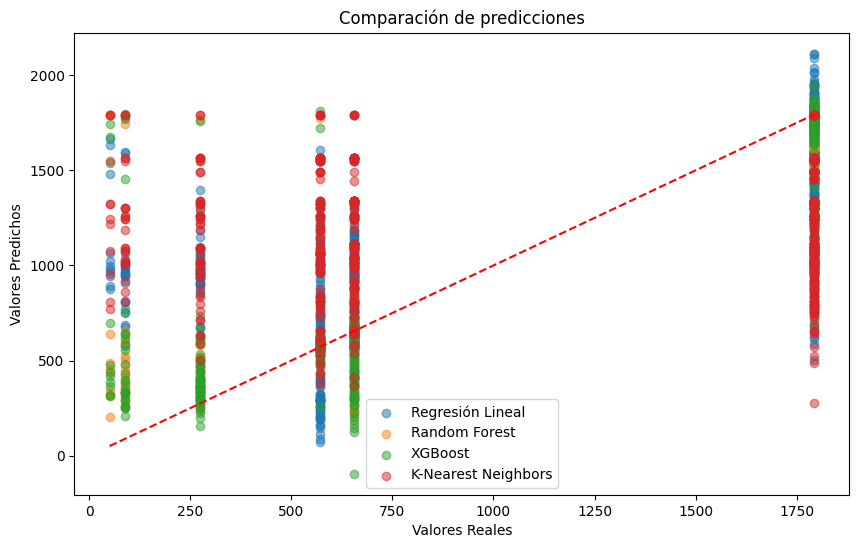

In [14]:
import matplotlib.pyplot as plt

# Evaluar cada modelo
evaluar_modelo(y_test, y_pred_lr, 'Regresión Lineal')
evaluar_modelo(y_test, y_pred_rf, 'Random Forest')
evaluar_modelo(y_test, y_pred_xgb, 'XGBoost')
evaluar_modelo(y_test, y_pred_knn, 'K-Nearest Neighbors')  # Evaluar KNN

# Visualización de los resultados
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, label='Regresión Lineal', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred_xgb, label='XGBoost', alpha=0.5)
plt.scatter(y_test, y_pred_knn, label='K-Nearest Neighbors', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Comparación de predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()

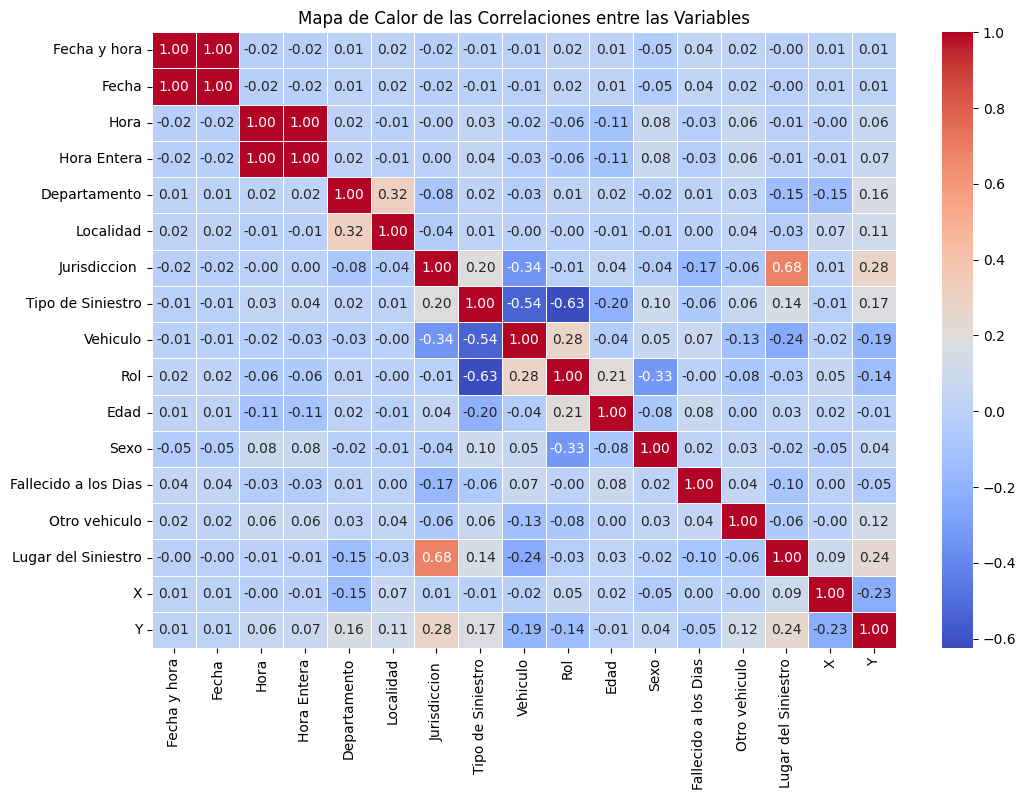

In [15]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Convertir variables categóricas en numéricas si es necesario
# Ya que probablemente ya codificaste las variables, puedes saltar este paso si ya están en formato numérico
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor utilizando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostrar el título del mapa de calor
plt.title('Mapa de Calor de las Correlaciones entre las Variables')
plt.show()


                 Feature  Importance
7               Vehiculo    0.565224
12         Otro vehiculo    0.383810
6          Jurisdiccion     0.008169
14                     X    0.006034
13   Lugar del Siniestro    0.004706
5              Localidad    0.003830
10                  Sexo    0.003756
11  Fallecido a los Dias    0.003667
4           Departamento    0.003560
0           Fecha y hora    0.003290
8                    Rol    0.002874
2                   Hora    0.002602
9                   Edad    0.002596
15                     Y    0.002479
3            Hora Entera    0.001938
1                  Fecha    0.001465


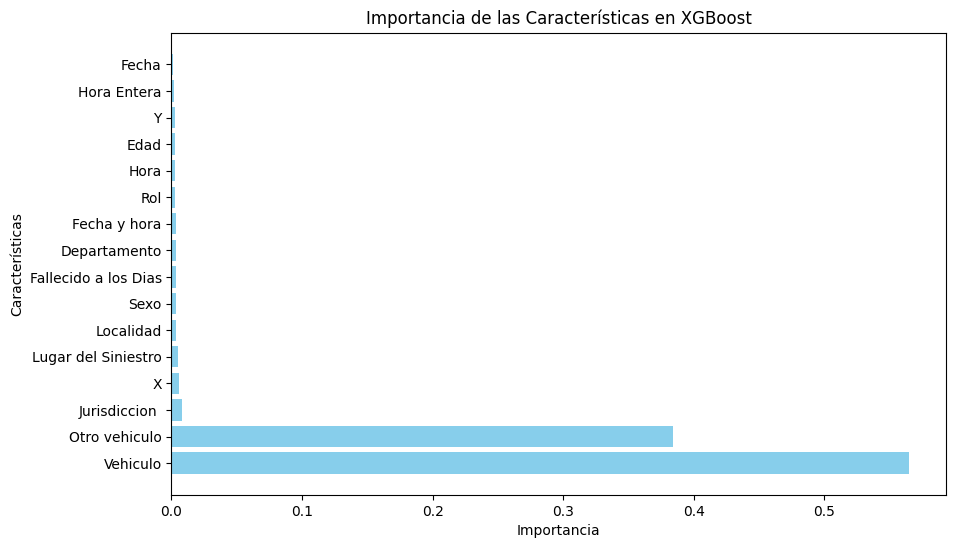

In [17]:
#NIVELES DE IMPORTANCIA PARA XGBOOST
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd

# Asumimos que ya tienes un modelo XGBoost entrenado
xgb_model = model_xgb  # Usa directamente el modelo de XGBoost que ya entrenaste

# Obtener y mostrar la importancia de las características
feature_importance = xgb_model.feature_importances_

# Asociar la importancia con los nombres de las características
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(importance_df)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en XGBoost')
plt.show()

                 Feature  Importance
8                    Rol  371.913430
10                  Sexo  111.380612
12         Otro vehiculo   54.510650
7               Vehiculo   14.509863
3            Hora Entera    4.986882
6          Jurisdiccion     3.298602
4           Departamento    2.814383
11  Fallecido a los Dias    2.548755
9                   Edad    1.333709
2                   Hora    0.314110
5              Localidad    0.283547
1                  Fecha    0.129616
0           Fecha y hora    0.083476
15                     Y    0.035979
14                     X    0.021157
13   Lugar del Siniestro    0.019400


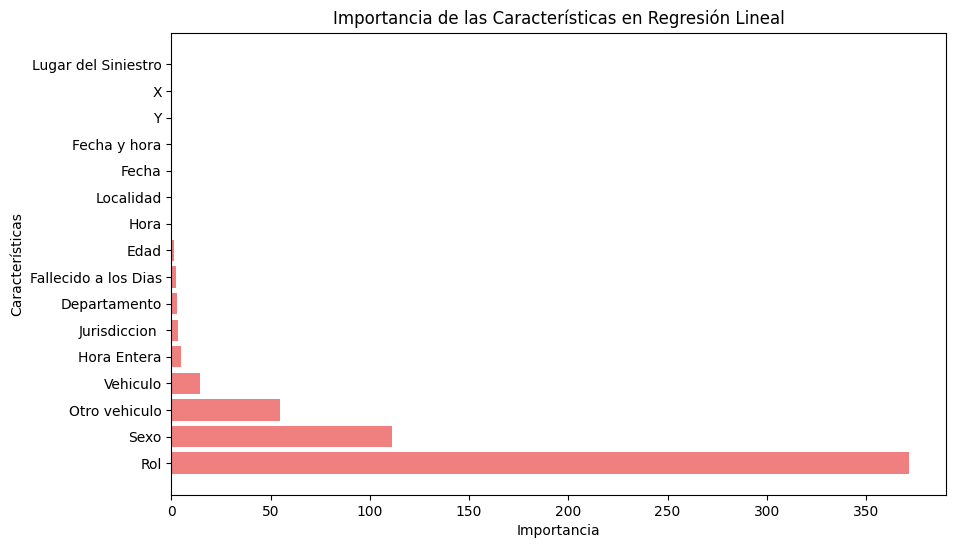

In [18]:
#NIVELES DE IMPORTANCIA PARA REGRESION LINEAL
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obtener la importancia de las características de la Regresión Lineal
linear_coef = model_lr.coef_

# Asociar la importancia con los nombres de las características
features = X.columns
importance_df_lr = pd.DataFrame({'Feature': features, 'Importance': np.abs(linear_coef)})

# Ordenar por importancia
importance_df_lr = importance_df_lr.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(importance_df_lr)

# Visualizar la importancia de las características en Regresión Lineal
plt.figure(figsize=(10, 6))
plt.barh(importance_df_lr['Feature'], importance_df_lr['Importance'], color='lightcoral')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en Regresión Lineal')
plt.show()


                 Feature  Importance
12         Otro vehiculo    0.503728
7               Vehiculo    0.216675
8                    Rol    0.214034
13   Lugar del Siniestro    0.013677
15                     Y    0.009360
14                     X    0.009130
0           Fecha y hora    0.005444
1                  Fecha    0.005166
9                   Edad    0.004749
2                   Hora    0.004319
5              Localidad    0.003986
11  Fallecido a los Dias    0.003505
3            Hora Entera    0.002654
4           Departamento    0.001823
10                  Sexo    0.000913
6          Jurisdiccion     0.000838


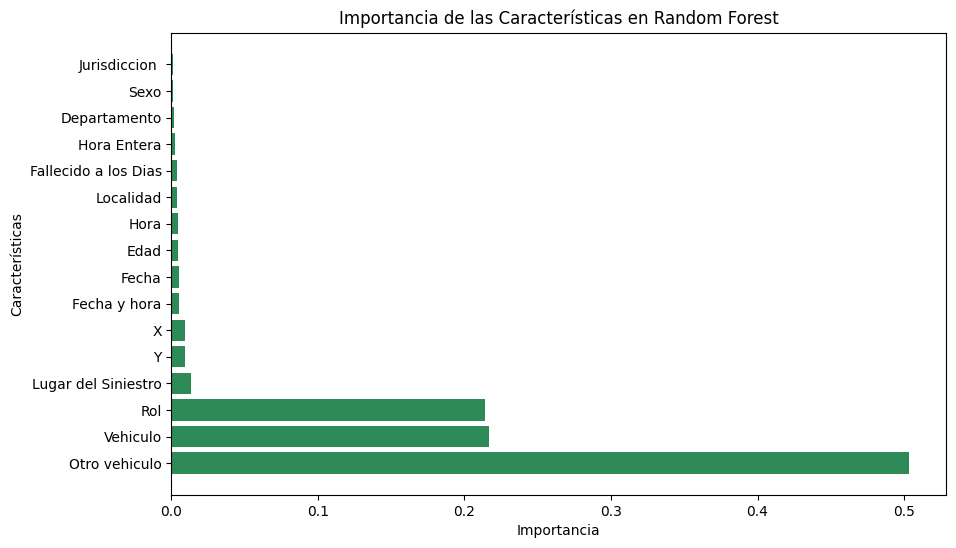

In [19]:
#NIVELES DE IMPORTANCIA PARA RANDOM FOREST
rf_importance = model_rf.feature_importances_

# Asociar la importancia con los nombres de las características
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': rf_importance})

# Ordenar por importancia
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(importance_df_rf)

# Visualizar la importancia de las características en Random Forest
plt.figure(figsize=(10, 6))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'], color='seagreen')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en Random Forest')
plt.show()


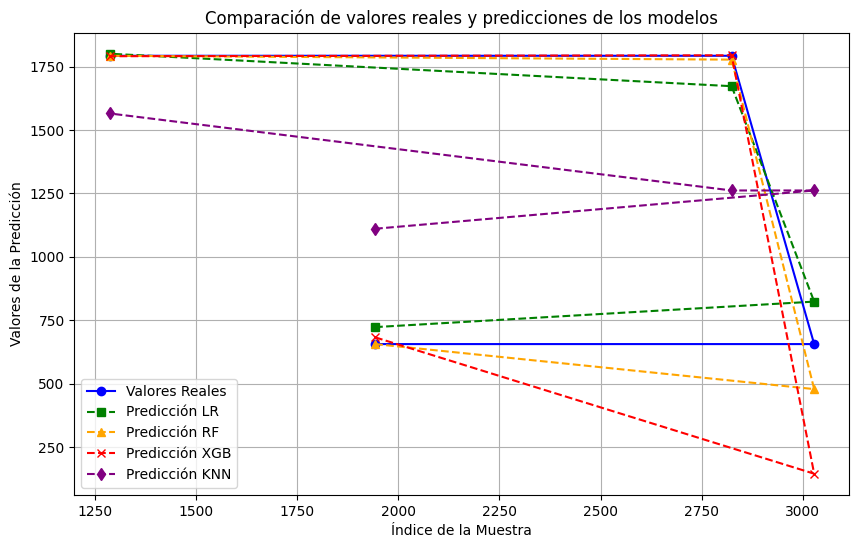

,Real,Predicción LR,Predicción RF,Predicción XGB,Predicción KNN
1943,656,722.944558,656.00,682.654419,1110.8
3028,656,823.520947,478.47,144.717834,1261.8
2824,1793,1673.079065,1777.81,1794.913086,1261.8
1287,1793,1801.113311,1793.00,1791.273315,1565.6


In [40]:
# Crear un DataFrame con las predicciones y los valores reales para cada modelo
comparison_df = pd.DataFrame({
    'Real': y_test,
    'Predicción LR': y_pred_lr,
    'Predicción RF': y_pred_rf,
    'Predicción XGB': y_pred_xgb,
    'Predicción KNN': y_pred_knn
})

# Visualización de las primeras 20 comparaciones
comparison_df_sample = comparison_df.head(4)

# Plot de las comparaciones
plt.figure(figsize=(10,6))
plt.plot(comparison_df_sample.index, comparison_df_sample['Real'], label='Valores Reales', color='blue', marker='o')
plt.plot(comparison_df_sample.index, comparison_df_sample['Predicción LR'], label='Predicción LR', linestyle='--', color='green', marker='s')
plt.plot(comparison_df_sample.index, comparison_df_sample['Predicción RF'], label='Predicción RF', linestyle='--', color='orange', marker='^')
plt.plot(comparison_df_sample.index, comparison_df_sample['Predicción XGB'], label='Predicción XGB', linestyle='--', color='red', marker='x')
plt.plot(comparison_df_sample.index, comparison_df_sample['Predicción KNN'], label='Predicción KNN', linestyle='--', color='purple', marker='d')

# Ajustes del gráfico
plt.title('Comparación de valores reales y predicciones de los modelos')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valores de la Predicción')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar la muestra de datos
comparison_df_sample


In [25]:
#Basado en los datos obtenidos por los diferentes tipos de modelos de preidicción, podemos concluir que el modelo  Random Forest fue el que mejor desempeño tuvo:
#Evaluación del modelo Random Forest:
MAE: 78.12997088791849
MSE: 47053.72576841339
R²: 0.8902245909478556

#Indicando que es el que mejor predice aparentemente.
# Dados los niveles de importancia, vemos el que tipo de vehículo es clave para determinar la fatalidad del siniestro. El Rol tambien cumple un papel muy importante



SyntaxError: invalid character '²' (U+00B2) (3345333857.py, line 5)